### Projet 4: Incertitude en polynômes du chaos

L'objetif de cette partie est la résolution de l'EDP:

$\frac{\partial \phi_{0}}{\partial t} +\frac{\partial^{2}\phi_{0}}{\partial x^{2}}(\frac{\mu^{2}+\nu^{2}}{2})+\frac{\partial^{2}\phi_{1}}{\partial x^{2}}(\mu\nu)+\frac{\partial^{2}\phi_{2}}{\partial x^{2}}\times \nu^2+k(x_{\infty}-x)\frac{\partial \phi_{0}}{\partial x} +x\phi_{0}+(1-g)\phi_{0}=0$
$\Leftrightarrow \frac{\partial\phi_{0}}{\partial t} +\frac{\partial^{2}\phi_{0}}{\partial x^{2}}(\frac{\mu^{2}+\nu^{2}}{2})+\frac{\partial^{2}\phi_{1}}{\partial x^{2}}(\mu\nu)+\frac{\partial^{2}\phi_{2}}{\partial x^{2}}\times \nu^2+k(x_{\infty}-x)\frac{\partial \phi_{0}}{\partial x} +x\phi_{0}+(1-\mu(t)-\eta x)\phi_{0}=0$

Ici pour résoudre cette équation pour $\phi_{0}$, on va considérer:

$\frac{\partial^{2}\phi_{1}}{\partial x^{2}}=0$

$\frac{\partial^{2}\phi_{1}}{\partial x^{2}}=0$

$u(0)=0$

L'équation est donc:

$\frac{\partial\phi_{0}}{\partial t} +\frac{\partial^{2}\phi_{0}}{\partial x^{2}}(\frac{\mu^{2}+\nu^{2}}{2})++k(x_{\infty}-x)\frac{\partial \phi_{0}}{\partial x} +x\phi_{0}+(1-\eta x)\phi_{0}=0$

$\Leftrightarrow \frac{\partial\phi_{0}}{\partial t} +\frac{\partial^{2}\phi_{0}}{\partial x^{2}}(\frac{\mu^{2}+\nu^{2}}{2})+kx_{\infty}\frac{\partial \phi_{0}}{\partial x}-x\frac{\partial \phi_{0}}{\partial x} +(1-\eta)x\phi_{0}+\phi_{0}=0$


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Définition des constantes:

In [39]:
n=100 #On prend 100 points pour notre modèle
mu=1
nu=1
eta=2
xi= np.random.normal(0, 1, n)
k=0.3
x_inf=0.005

In [40]:
### Construction de la matrice tridiagonale
T=1
S_0=1
x_max=2*S_0
m=10
dt=T/n
dx=x_max/m


##2ème terme
mat_tridiag=np.eye(m)*2+np.eye(m,k=1)+ np.eye(m,k=-1)
mat_tridiag=mat_tridiag*((mu*mu+nu*nu)/2)

##3ème terme
iden_2=-np.eye(m)+np.eye(m,k=-1)
iden_2=iden_2*(k*x_inf)

###4ème terme
iden= np.eye(m)+np.eye(m,k=-1)
cpt_row=0
cpt_col=0
for i in iden:
    iden[cpt_row,cpt_col-1]=k*cpt_row
    iden[cpt_row,cpt_col]=-k*cpt_row
    cpt_row=cpt_row+1
    cpt_col=cpt_col+1

##5ème terme
iden_3=np.eye(m)
cpt_row=0
cpt_col=0
for i in iden_3:
    iden[cpt_row,cpt_col]=(1-eta)*cpt_row
    cpt_row=cpt_row+1
    cpt_col=cpt_col+1

##6ème terme
iden_3=np.eye(m)









In [41]:
## Définition des conditions initiales

iden[len(iden)-1]=0
iden_2[len(iden_2)-1]=0
iden_3[len(iden_3)-1]=0

mat_tridiag[len(mat_tridiag)-1]=0

In [44]:
mat=(dt)*iden+(dt)*mat_tridiag+dt*iden_2+dt*iden_3
mat[0]=0
print(mat)

[[ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 1.3015e-02  2.0015e-02  1.0000e-02  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  1.6015e-02  1.0015e-02  1.0000e-02  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  1.9015e-02  1.5000e-05  1.0000e-02  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  2.2015e-02 -9.9850e-03  1.0000e-02
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  2.5015e-02 -1.9985e-02
   1.0000e-02  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  2.8015e-02
  -2.9985e-02  1.0000e-02  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   3.1015e-02 -3.9985e-02  1.0000e-02  0.0000e+00]


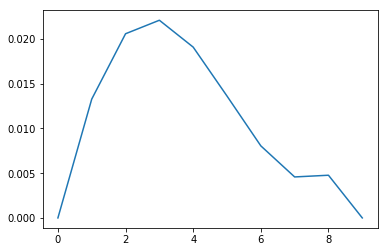

In [45]:
U=[]
U=[np.sin(np.pi*k/x_max) for k in np.linspace(0,x_max,m)]
V=np.dot(mat,U)
plt.plot(V)